In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
data.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


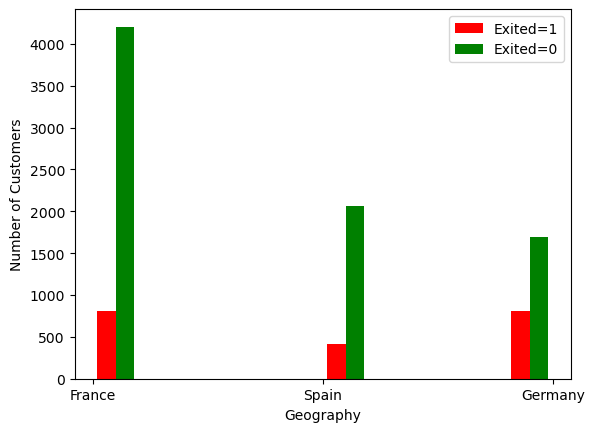

In [10]:
country_yes=data[data.Exited==1].Geography
country_no=data[data.Exited==0].Geography
plt.hist([country_yes, country_no], color=['red','green'], label=['Exited=1', 'Exited=0'])
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend()

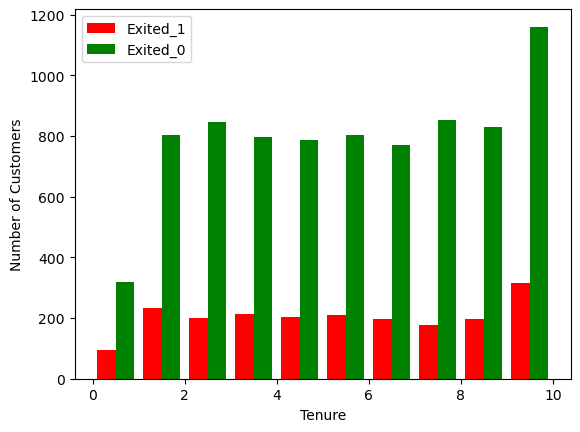

In [19]:
tenure_yes=data[data.Exited==1].Tenure
tenure_no=data[data.Exited==0].Tenure
plt.hist([tenure_yes, tenure_no], color=['red', 'green'], label=['Exited_1', 'Exited_0'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()

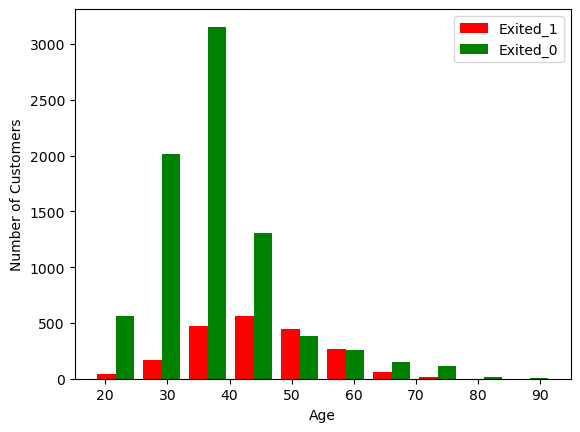

In [21]:
age_yes=data[data.Exited==1].Age 
age_no=data[data.Exited==0].Age
plt.hist([age_yes, age_no], color=['red', 'green'], label=['Exited_1', 'Exited_0'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend()

In [11]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data.replace({'Female':0, 'Male':1}, inplace=True)

In [16]:
data.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [47]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [22]:
new_data=pd.get_dummies(data, columns=['Geography'])
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [38]:
cols_to_scale=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_data[cols_to_scale]=scaler.fit_transform(new_data[cols_to_scale])

In [49]:
X=new_data.drop('Exited',axis='columns')

In [50]:
y=new_data['Exited']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=10)

In [59]:
len(X_train)

8000

In [60]:
X_train.shape

(8000, 12)

In [61]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7496,0.948,1,0.418919,0.8,0.531018,0.000000,1,1,0.339401,0,1,0
7694,0.652,0,0.621622,0.4,0.466143,0.000000,1,1,0.455733,0,0,1
9248,0.558,1,0.216216,0.6,0.000000,0.333333,1,0,0.951772,0,0,1
2470,0.678,0,0.175676,0.3,0.557197,0.000000,0,1,0.603318,0,0,1
4392,0.874,1,0.445946,0.0,0.231716,0.000000,0,1,0.712702,1,0,0


In [66]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5841 - accuracy: 0.6826
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.8000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.8064
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.8123
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8185
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 0.8286
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8338
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8370
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3695 - accuracy: 0.8396
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8465

In [67]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8470


[0.37519267201423645, 0.847000002861023]

In [69]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 22ms/step


array([[0.49527204],
       [0.45477626],
       [0.50801957],
       [0.02696471],
       [0.49428195]], dtype=float32)

In [71]:
y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

In [72]:
yp=model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [73]:
yp[:5]

array([[0.49527204],
       [0.45477626],
       [0.50801957],
       [0.02696472],
       [0.49428195]], dtype=float32)

In [75]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [77]:
y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

In [78]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1578
           1       0.79      0.38      0.51       422

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [79]:
cm=tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1535,   43],
       [ 263,  159]])>

Text(50.722222222222214, 0.5, 'Truth')

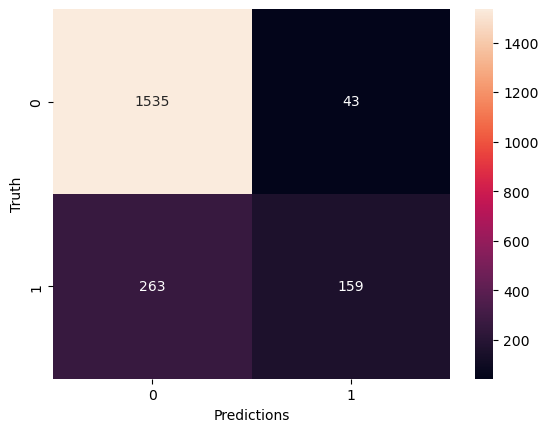

In [80]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')